In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# ice-hockey-analytics EDA

## Reading csv files- game data, game plays, game plays players, game team stats and game golie stats

In [2]:
game=pd.read_csv('/kaggle/input/nhl-game-data/game.csv')
game.head()

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT
1,2017020812,20172018,R,2018-02-07T00:00:00Z,24,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2015020314,20152016,R,2015-11-24T01:00:00Z,21,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT
3,2015020849,20152016,R,2016-02-17T00:00:00Z,52,12,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT
4,2017020586,20172018,R,2017-12-30T03:00:00Z,20,24,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT


In [3]:
game_plays=pd.read_csv('/kaggle/input/nhl-game-data/game_plays.csv')
game_plays.head()

,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y
0,2016020045_1,2016020045,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-18 23:40:58,0,0,Game Scheduled,NaN,NaN
1,2016020045_2,2016020045,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-19 01:35:28,0,0,Period Ready,NaN,NaN
2,2016020045_3,2016020045,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-19 01:40:50,0,0,Period Start,NaN,NaN
3,2016020045_4,2016020045,16.0,4.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200.0,2016-10-19 01:40:50,0,0,Jonathan Toews faceoff won against Claude Giroux,0.0,0.0
4,2016020045_5,2016020045,16.0,4.0,Shot,Wrist Shot,-71.0,9.0,1,REGULAR,54,1146.0,2016-10-19 01:41:44,0,0,Artem Anisimov Wrist Shot saved by Michal Neuv...,71.0,-9.0


In [4]:
game_plays_players=pd.read_csv('/kaggle/input/nhl-game-data/game_plays_players.csv')
game_plays_players.head()

,play_id,game_id,player_id,playerType
0,2016020045_4,2016020045,8473604,Winner
1,2016020045_4,2016020045,8473512,Loser
2,2016020045_5,2016020045,8473573,Shooter
3,2016020045_5,2016020045,8473607,Goalie
4,2016020045_6,2016020045,8474141,Scorer


In [5]:
game_team_stats=pd.read_csv('/kaggle/input/nhl-game-data/game_teams_stats.csv')
game_team_stats.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


In [6]:
game_golie_stats=pd.read_csv('/kaggle/input/nhl-game-data/game_goalie_stats.csv')
game_golie_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2016020045,8473607,4,1504,0,0,0,16,12,1,0,11,0,13,3,NaN,75.000000,33.333333,84.615385
1,2016020045,8473461,4,2011,0,0,0,11,9,1,0,8,0,10,1,L,81.818182,100.000000,80.000000
2,2016020045,8470645,16,3598,0,0,0,27,23,2,0,21,0,23,4,W,85.185185,50.000000,91.304348
3,2017020812,8468011,24,3696,0,0,0,33,30,1,2,27,3,28,2,W,90.909091,50.000000,96.428571
4,2017020812,8475215,7,3539,0,0,0,33,29,4,1,24,1,27,5,L,87.878788,80.000000,88.888889


In [7]:
game_plays.describe()

,game_id,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
count,5.050529e+06,4.117824e+06,4.117824e+06,3.916165e+06,3.916196e+06,5.050529e+06,5.050529e+06,4.857510e+06,5.050529e+06,5.050529e+06,3.916165e+06,3.916165e+06
mean,2.014891e+09,1.774251e+01,1.769530e+01,1.870930e-01,-1.592162e-01,2.027452e+00,5.873354e+02,5.977131e+02,1.245695e+00,1.378458e+00,1.002389e+01,1.851768e-01
std,3.627240e+06,1.246832e+01,1.244507e+01,6.428284e+01,2.297686e+01,8.735167e-01,3.657126e+02,3.645106e+02,1.318483e+00,1.418523e+00,6.349677e+01,2.297670e+01
min,2.000020e+09,1.000000e+00,1.000000e+00,-1.000000e+02,-4.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+02,-4.200000e+01
25%,2.012030e+09,8.000000e+00,8.000000e+00,-6.900000e+01,-2.200000e+01,1.000000e+00,2.670000e+02,2.800000e+02,0.000000e+00,0.000000e+00,-6.200000e+01,-2.200000e+01
50%,2.015030e+09,1.600000e+01,1.600000e+01,0.000000e+00,0.000000e+00,2.000000e+00,5.810000e+02,5.980000e+02,1.000000e+00,1.000000e+00,3.300000e+01,0.000000e+00
75%,2.018021e+09,2.400000e+01,2.400000e+01,6.900000e+01,2.200000e+01,3.000000e+00,9.040000e+02,9.150000e+02,2.000000e+00,2.000000e+00,6.900000e+01,2.200000e+01
max,2.019041e+09,9.000000e+01,9.000000e+01,1.000000e+02,4.200000e+01,8.000000e+00,1.200000e+03,1.200000e+03,1.100000e+01,1.200000e+01,1.000000e+02,4.200000e+01


In [8]:
game_plays.isna().sum()

play_id                      0
game_id                      0
team_id_for             932705
team_id_against         932705
event                        0
secondaryType          3868513
x                      1134364
y                      1134333
period                       0
periodType                   0
periodTime                   0
periodTimeRemaining     193019
dateTime                     0
goals_away                   0
goals_home                   0
description                  0
st_x                   1134364
st_y                   1134364
dtype: int64

In [9]:
game_plays.event.unique()

array(['Game Scheduled', 'Period Ready', 'Period Start', 'Faceoff',
       'Shot', 'Goal', 'Takeaway', 'Hit', 'Stoppage', 'Blocked Shot',
       'Giveaway', 'Missed Shot', 'Penalty', 'Period End',
       'Period Official', 'Game End', 'Official Challenge',
       'Shootout Complete', 'Early Intermission Start',
       'Early Intermission End', 'Game Official', 'Emergency Goaltender'],
      dtype=object)

In [10]:
shots=game_plays[(game_plays.event=='Shot') | (game_plays.event=='Goal') | (game_plays.event=='Missed Shot')| (game_plays.event=='Blocked Shot')]
shots.head()
len(shots)

1783292

In [11]:
goals=game_plays[(game_plays.event=='Goal')]
len(goals)

148992

In [12]:
game.describe()

,game_id,season,away_team_id,home_team_id,away_goals,home_goals,venue_time_zone_offset
count,2.630500e+04,2.630500e+04,26305.000000,26305.000000,26305.000000,26305.000000,26305.000000
mean,2.010765e+09,2.010945e+07,16.879377,16.881429,2.687968,2.958981,-5.066147
std,6.073568e+06,6.073849e+04,11.184920,11.205625,1.619068,1.689031,1.210145
min,2.000020e+09,2.000200e+07,1.000000,1.000000,0.000000,0.000000,-8.000000
25%,2.006020e+09,2.006201e+07,8.000000,8.000000,1.000000,2.000000,-6.000000
50%,2.011021e+09,2.011201e+07,16.000000,16.000000,3.000000,3.000000,-5.000000
75%,2.016030e+09,2.016202e+07,24.000000,24.000000,4.000000,4.000000,-4.000000
max,2.019041e+09,2.019202e+07,90.000000,90.000000,11.000000,12.000000,-4.000000


In [13]:
game.isna().sum()

game_id                      0
season                       0
type                         0
date_time_GMT                0
away_team_id                 0
home_team_id                 0
away_goals                   0
home_goals                   0
outcome                      0
home_rink_side_start      1196
venue                        0
venue_link                   0
venue_time_zone_id           0
venue_time_zone_offset       0
venue_time_zone_tz           0
dtype: int64

# Shot Analysis

The 4 main types of shots in hockey are wrist shots, snap shots, slap shots, and backhand shots. I will also include wrap arounds because they are quite a fun type of shot.

Snap-shots and wrist shots are relatively spread out both horizontally and vertically but are slightly favored to be centered and towards the net where the best shots usually are. Although, snap shots have slightly more activity in the wings.

Slap shots generally come more from around the blue line and are usually not centered . Many slap shots come from standard position of defensemen. 

Backhand shots typically are highly centered and highly close to the net.

Wrap around shots due to their nature are often shot at the ends of the net and in very close proximity to the net.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC 
from sklearn import metrics

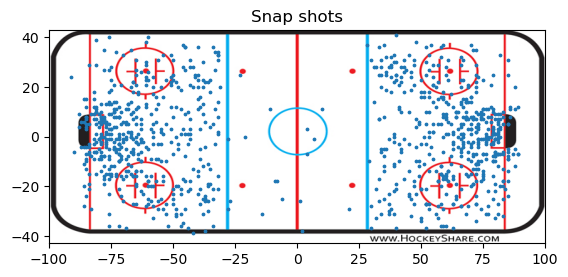

In [15]:
snap_sample = shots.sample(n=1000, replace=False)
snapgoal_samp=goals.sample(n=1000, replace=False)
x_coords = snap_sample['x']
y_coords = snap_sample['y']
x_coords2 = snap_sample['x']
y_coords2 = snap_sample['y']
event=shots['event']
img = plt.imread("/kaggle/input/hockey-data/hockey_rink_diagram.jpg")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=3)
plt.title('Snap shots')
plt.show()

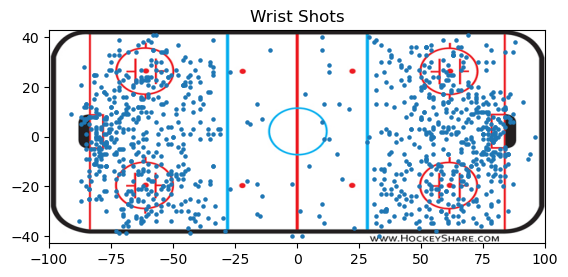

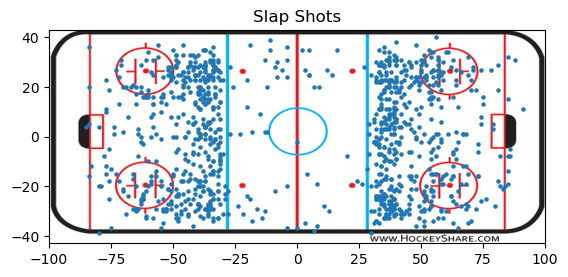

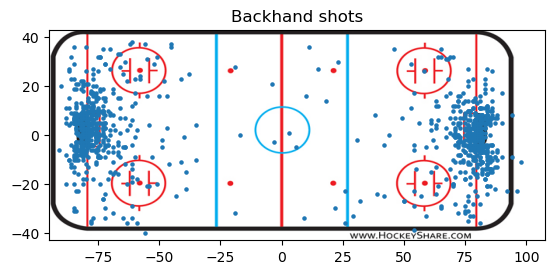

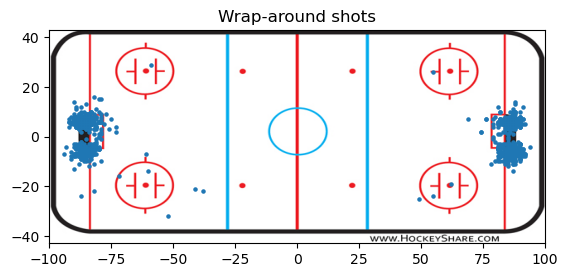

In [16]:
wrist=shots[shots['secondaryType']=='Wrist Shot']
wrist_sample = wrist.sample(n=1000, replace=False)
x_coords = wrist_sample['x']
y_coords = wrist_sample['y']
#image
img = plt.imread("/kaggle/input/hockey-data/hockey_rink_diagram.jpg")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=5)
plt.title('Wrist Shots')
plt.show()

slap=shots[shots['secondaryType']=='Slap Shot']
slap_sample = slap.sample(n=1000, replace=False)
x_coords = slap_sample['x']
y_coords = slap_sample['y']
#image
img = plt.imread("/kaggle/input/hockey-data/hockey_rink_diagram.jpg")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=5)
plt.title('Slap Shots')
plt.show()

Backhand=shots[shots['secondaryType']=='Backhand']
Backhand_sample = Backhand.sample(n=1000, replace=False)
x_coords = Backhand_sample['x']
y_coords = Backhand_sample['y']
#image
img = plt.imread("/kaggle/input/hockey-data/hockey_rink_diagram.jpg")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-95, 95, -43, 43])
plt.scatter(x_coords, y_coords,s=5)
plt.title('Backhand shots')
plt.show()

wrap=shots[shots['secondaryType']=='Wrap-around']
wrap_sample = wrap.sample(n=1000, replace=False)
x_coords = wrap_sample['x']
y_coords = wrap_sample['y']
#image
img = plt.imread("/kaggle/input/hockey-data/hockey_rink_diagram.jpg")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords,s=5)
plt.title('Wrap-around shots')
plt.show()

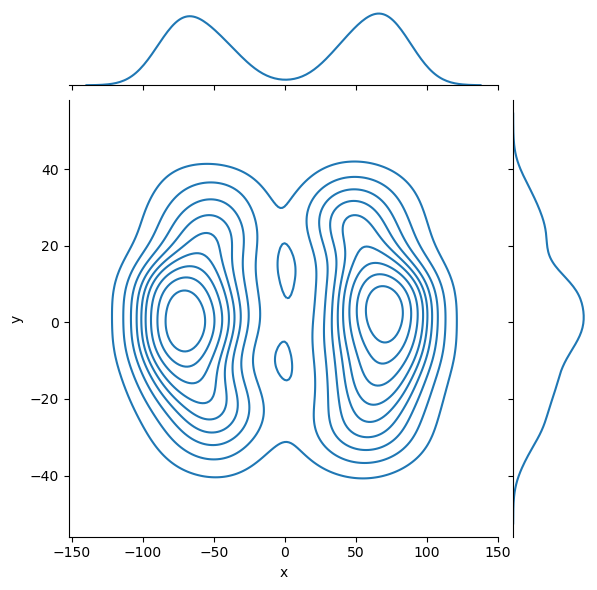

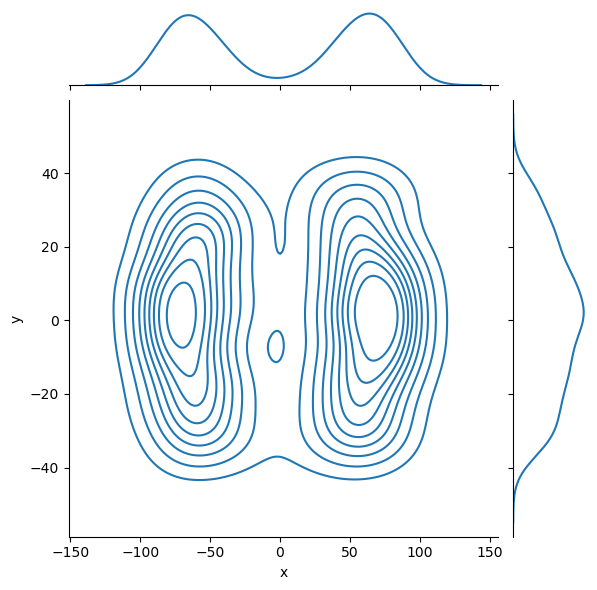

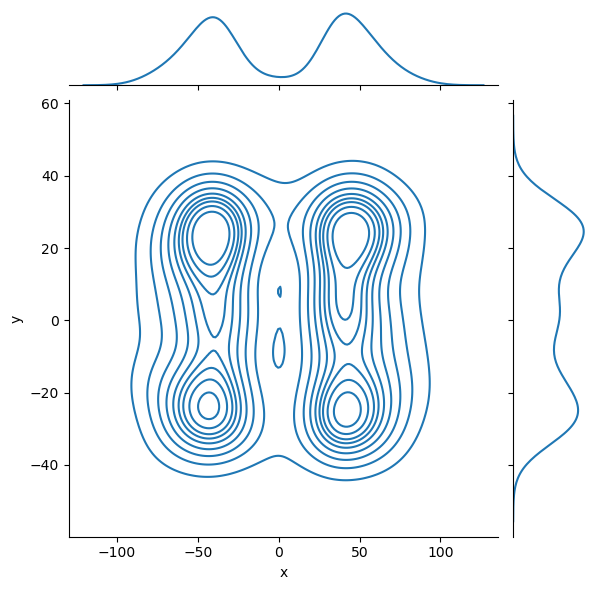

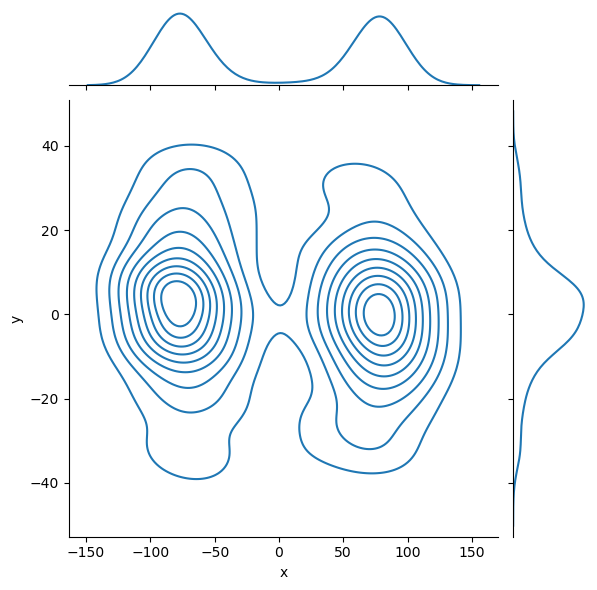

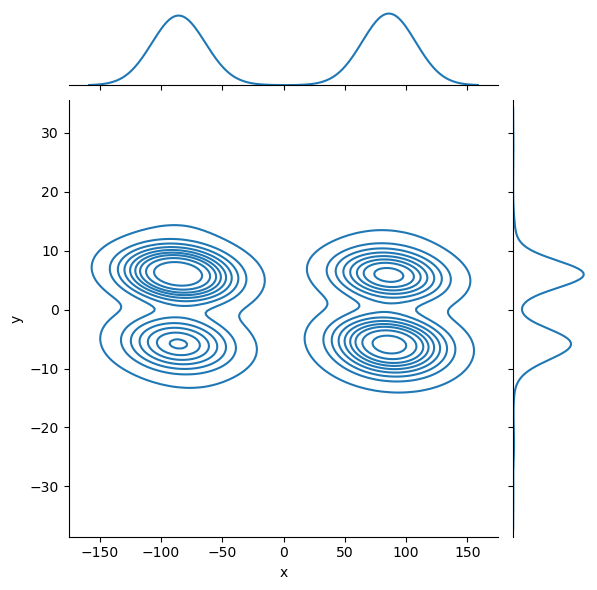

In [17]:
sns.jointplot(x="x", y="y", data=snap_sample,kind="kde");
sns.jointplot(x="x", y="y", data=wrist_sample,kind="kde");
sns.jointplot(x="x", y="y", data=slap_sample,kind="kde");
sns.jointplot(x="x", y="y", data=Backhand_sample,kind="kde");
sns.jointplot(x="x", y="y", data=wrap_sample,kind="kde");

[Text(0, 0, 'Wrist Shot'),
 Text(1, 0, 'Slap Shot'),
 Text(2, 0, 'Snap Shot'),
 Text(3, 0, 'Backhand'),
 Text(4, 0, 'Tip-In'),
 Text(5, 0, 'Deflected'),
 Text(6, 0, 'Wrap-around')]

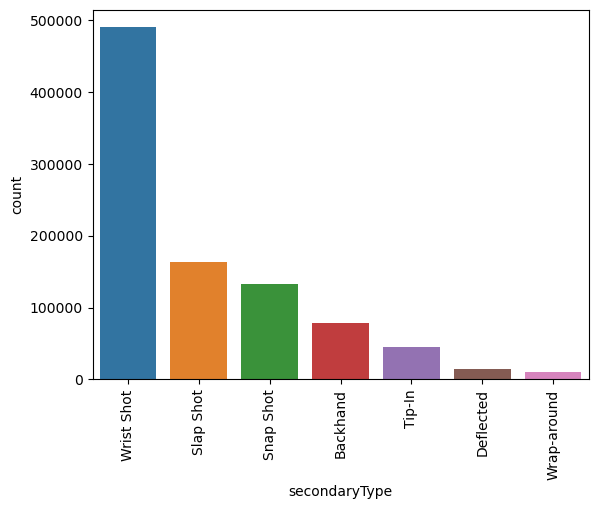

In [18]:
total_shots=shots.groupby('secondaryType').count()
plot2=sns.countplot(x = 'secondaryType',
              data = shots,
              order = shots['secondaryType'].value_counts().index)
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=90)

[Text(0, 0, 'Wrist Shot'),
 Text(1, 0, 'Snap Shot'),
 Text(2, 0, 'Slap Shot'),
 Text(3, 0, 'Backhand'),
 Text(4, 0, 'Tip-In'),
 Text(5, 0, 'Deflected'),
 Text(6, 0, 'Wrap-around')]

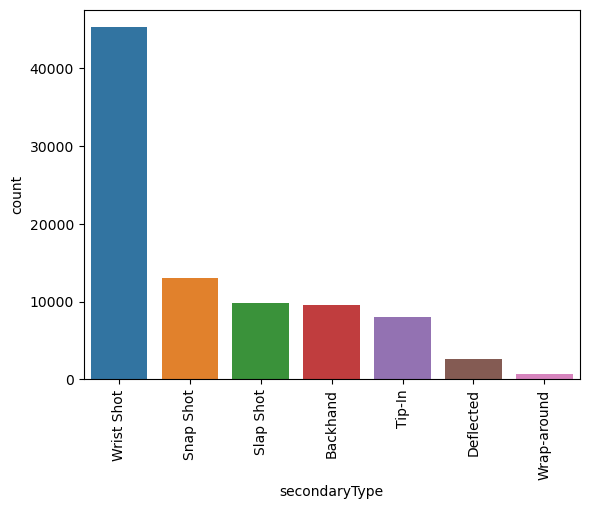

In [19]:
total_goals=goals.groupby('secondaryType').count()
plot2=sns.countplot(x = 'secondaryType',
              data = goals,
              order = goals['secondaryType'].value_counts().index)
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=90)

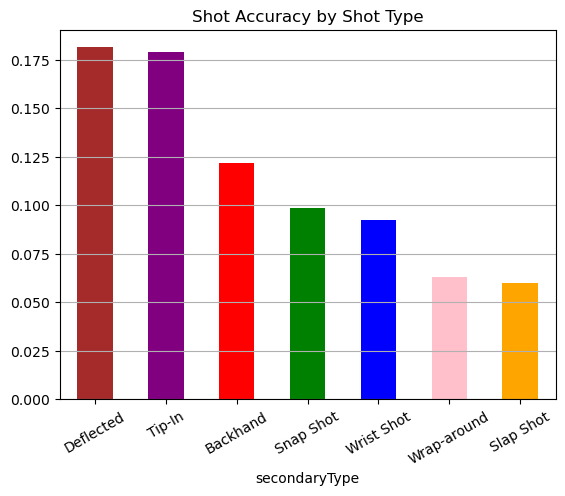

In [20]:
shot_accuracy=total_goals/total_shots
shot_accuracy.iloc[:,1].loc[["Deflected", "Tip-In", "Backhand","Snap Shot","Wrist Shot","Wrap-around","Slap Shot"]].plot(kind='bar',title='Shot Accuracy by Shot Type',color=['brown', 'purple', 'red', 'g','b','pink','orange'],rot=30).grid(axis='y')

# Outcome Prediction using Multi Linear Regression

### Input Parameters: [x1,x2,x3]
1. `season` (this would suffice for the game_id and date-time)
2. `home_team id` and `away_team id` (We included this instead of game_id as because the game_id's would change for each games played and there's no correlation of game_id's wrt the outcome predicted but the individual team might account for any games played between the same teams in the future.)
3. `home_rink_side_start`
4. `venue`

P.S. We're discarding all string inputs such as Type, venue etc.
### Output Parameter: [y]
1. `outcome` 

In [21]:
!pip install scikit-learn

In [22]:
game=pd.read_csv('/kaggle/input/nhl-game-data/game.csv')
game.head(10)

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT
1,2017020812,20172018,R,2018-02-07T00:00:00Z,24,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2015020314,20152016,R,2015-11-24T01:00:00Z,21,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT
3,2015020849,20152016,R,2016-02-17T00:00:00Z,52,12,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT
4,2017020586,20172018,R,2017-12-30T03:00:00Z,20,24,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT
5,2016020610,20162017,R,2017-01-10T00:30:00Z,15,8,4,1,away win REG,right,Centre Bell,/api/v1/venues/null,America/Montreal,-4,EDT
6,2015020606,20152016,R,2016-01-08T03:30:00Z,10,26,1,2,home win REG,right,STAPLES Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT
7,2017020240,20172018,R,2017-11-10T03:00:00Z,23,24,1,4,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT
8,2017020624,20172018,R,2018-01-05T02:00:00Z,29,21,0,2,home win REG,right,Pepsi Center,/api/v1/venues/null,America/Denver,-6,MDT
9,2015020346,20152016,R,2015-11-29T00:00:00Z,22,5,3,2,away win OT,left,CONSOL Energy Center,/api/v1/venues/null,America/New_York,-4,EDT


In [23]:
list=["away_team_id","home_team_id","home_rink_side_start","venue","outcome"]
df=game[list]
df.head(10)

,away_team_id,home_team_id,home_rink_side_start,venue,outcome
0,4,16,right,United Center,home win REG
1,24,7,left,KeyBank Center,away win OT
2,21,52,right,MTS Centre,away win REG
3,52,12,right,PNC Arena,home win REG
4,20,24,left,Honda Center,home win REG
5,15,8,right,Centre Bell,away win REG
6,10,26,right,STAPLES Center,home win REG
7,23,24,left,Honda Center,home win REG
8,29,21,right,Pepsi Center,home win REG
9,22,5,left,CONSOL Energy Center,away win OT


In [24]:
df['outcome'] = df['outcome'].apply(lambda x: 1 if x.startswith('home') else 0)
df.head()

/tmp/ipykernel_20/3650482934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outcome'] = df['outcome'].apply(lambda x: 1 if x.startswith('home') else 0)


,away_team_id,home_team_id,home_rink_side_start,venue,outcome
0,4,16,right,United Center,1
1,24,7,left,KeyBank Center,0
2,21,52,right,MTS Centre,0
3,52,12,right,PNC Arena,1
4,20,24,left,Honda Center,1


In [25]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame named 'df' with five columns: 'numeric_column1', 'numeric_column2',
# 'string_column1', 'string_column2', and 'outcome'

# Separate the input features (X) and the target variable (y)
X = df[['away_team_id', "home_team_id", 'home_rink_side_start', 'venue']]
y = df['outcome']

# Preprocess the string columns using one-hot encoding
categorical_columns = ['home_rink_side_start', 'venue']
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)
X_preprocessed = preprocessor.fit_transform(X)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)




In [26]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the random forest classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Convert the numerical predictions back to categorical labels
#y_pred_labels = label_encoder.inverse_transform(predictions)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5599695875308877


In [27]:
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression classifier
classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5424824177912945


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:

from sklearn.svm import SVC


# Initialize the SVM classifier
classifier = SVC()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.534118988785402
